<a href="https://colab.research.google.com/github/parthpendal/Projects---Data-Analysis-and-Machine-Learning/blob/main/Customer_Churn_Prediction_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras

In [ ]:
df=pd.read_csv("Customer-Churn.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.drop("customerID",axis=1, inplace=True)


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df.TotalCharges=pd.to_numeric(df.TotalCharges,errors='coerce')

In [ ]:
df.TotalCharges.isna().sum()

11

In [ ]:
df.shape

(7043, 20)

In [ ]:
df=df[df.TotalCharges.notna()]

In [ ]:
df.shape

(7032, 20)

In [ ]:
df["Churn"]=df["Churn"].replace({"No":0,"Yes":1}).astype("int64")

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ffe70e050>,
      dtype=object)

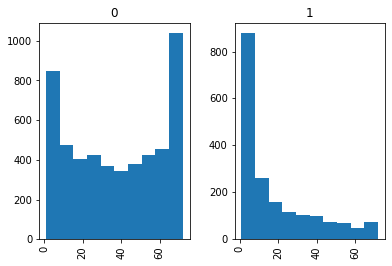

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df[["tenure","Churn"]].hist(column="tenure",by="Churn")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ffde24f10>,
      dtype=object)

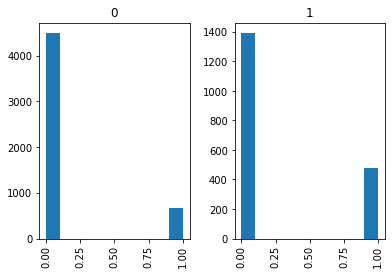

In [ ]:
df[["SeniorCitizen","Churn"]].hist(column="SeniorCitizen",by="Churn")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ffe704fd0>,
      dtype=object)

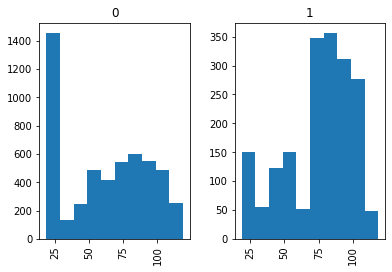

In [ ]:
df[["MonthlyCharges","Churn"]].hist(column="MonthlyCharges",by="Churn")

In [ ]:
print(df.apply(lambda col: col.unique())) 

gender                                                 [Female, Male]
SeniorCitizen                                                  [0, 1]
Partner                                                     [Yes, No]
Dependents                                                  [No, Yes]
tenure              [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
PhoneService                                                [No, Yes]
MultipleLines                             [No phone service, No, Yes]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity                         [No, Yes, No internet service]
OnlineBackup                           [Yes, No, No internet service]
DeviceProtection                       [No, Yes, No internet service]
TechSupport                            [No, Yes, No internet service]
StreamingTV                            [No, Yes, No internet service]
StreamingMovies                        [No, Yes, No internet service]
Contract            

In [ ]:
df.MultipleLines=df.MultipleLines.replace({"No phone service":"No"})
df.replace({"No internet service":"No"},inplace=True)

In [ ]:
df=df.replace({"No":0,"Yes":1})

In [ ]:
print(df.apply(lambda col: col.unique())) 

gender                                                 [Female, Male]
SeniorCitizen                                                  [0, 1]
Partner                                                        [1, 0]
Dependents                                                     [0, 1]
tenure              [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
PhoneService                                                   [0, 1]
MultipleLines                                                  [0, 1]
InternetService                                 [DSL, Fiber optic, 0]
OnlineSecurity                                                 [0, 1]
OnlineBackup                                                   [1, 0]
DeviceProtection                                               [0, 1]
TechSupport                                                    [0, 1]
StreamingTV                                                    [0, 1]
StreamingMovies                                                [0, 1]
Contract            

In [ ]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df1=pd.get_dummies(df,columns=['gender','InternetService', 'Contract', 'PaymentMethod'])

In [ ]:
df1.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Female',
       'gender_Male', 'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df1.shape

(7032, 28)

In [ ]:
cols_to_scale =['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df1[cols_to_scale]=scaler.fit_transform(df1[cols_to_scale])

In [ ]:
  df1[cols_to_scale].head()

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330


In [ ]:
x=df1.drop("Churn",axis=1)
y=df1.Churn

In [ ]:
x.shape

(7032, 27)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(27,),activation='relu'),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(5,input_shape=(27,),activation='relu'),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#model.fit(x_train,y_train,epochs=20)

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(x_train,y_train,epochs=100,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/100
141/141 [==============================] - 3s 14ms/step - loss: 0.5461 - accuracy: 0.7384 - val_loss: 0.4828 - val_accuracy: 0.7236
Epoch 2/100
141/141 [==============================] - 1s 8ms/step - loss: 0.4568 - accuracy: 0.7496 - val_loss: 0.4542 - val_accuracy: 0.7671
Epoch 3/100
141/141 [==============================] - 1s 8ms/step - loss: 0.4380 - accuracy: 0.7898 - val_loss: 0.4408 - val_accuracy: 0.7778
Epoch 4/100
141/141 [==============================] - 1s 8ms/step - loss: 0.4299 - accuracy: 0.7956 - val_loss: 0.4374 - val_accuracy: 0.7884
Epoch 5/100
141/141 [==============================] - 1s 7ms/step - loss: 0.4271 - accuracy: 0.8002 - val_loss: 0.4348 - val_accuracy: 0.7876
Epoch 6/100
141/141 [==============================] - 1s 8ms/step - loss: 0.4230 - accuracy: 0.8013 - val_loss: 0.4314 - val_accuracy: 0.7884
Epoch 7/100
141/141 [==============================] - 1s 7ms/step - loss: 0.4219 - accuracy: 0.8022 - val_loss: 0.4305 - val_accuracy: 0.790

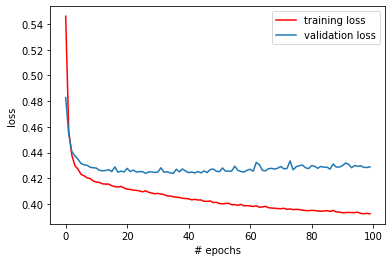

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

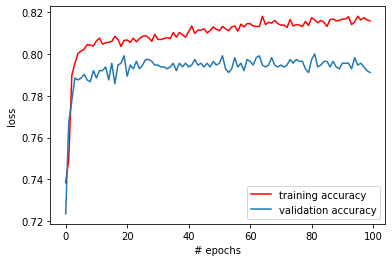

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4241 - accuracy: 0.8131


[0.42413681745529175, 0.813077449798584]

In [ ]:
yp=model.predict(x_test)
yp[:5]

array([[0.0146822 ],
       [0.02148515],
       [0.05883679],
       [0.06099001],
       [0.12947932]], dtype=float32)

In [ ]:
y_pred=[]

for element in yp:
  if element >0.5:
    y_pred.append(1)
  if element <0.5:
    y_pred.append(0)

y_pred[:5]

[0, 0, 0, 0, 0]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1017
           1       0.69      0.59      0.64       390

    accuracy                           0.81      1407
   macro avg       0.77      0.75      0.76      1407
weighted avg       0.81      0.81      0.81      1407

